9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


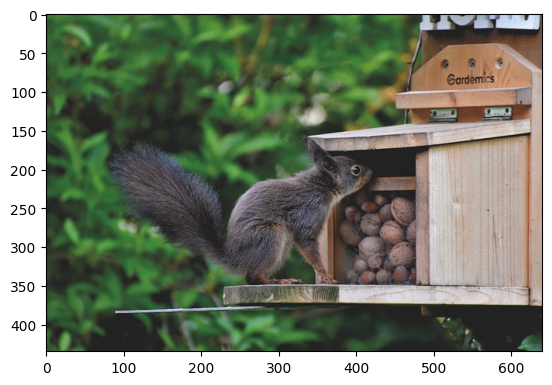

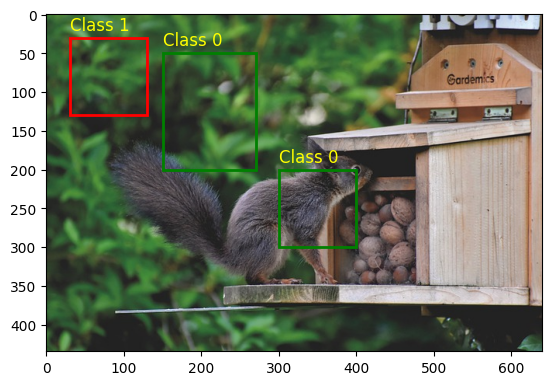

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, Model
from PIL import Image

# Simplified fixed region proposals (x, y, width, height)
def get_region_proposals():
    return [
        (30, 30, 100, 100),
        (150, 50, 120, 150),
        (300, 200, 100, 100),
    ]

# Simple classifier model on top of extracted features
def build_classifier(input_shape, num_classes=2):
    inputs = layers.Input(shape=input_shape)
    x = layers.GlobalAveragePooling2D()(inputs)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

# Load pretrained MobileNetV2 and chop off top layers for feature extraction
base_model = MobileNetV2(include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

classifier = build_classifier(base_model.output_shape[1:], num_classes=2)

# Load and prepare the image
img_path = '/content/1.jpg'  # Replace with your image path
img = Image.open(img_path).convert('RGB')
plt.imshow(img)

regions = get_region_proposals()

fig, ax = plt.subplots(1)
ax.imshow(img)

for (x, y, w, h) in regions:
    # Crop and preprocess each region
    crop = img.crop((x, y, x + w, y + h)).resize((128, 128))
    crop_array = np.array(crop)
    crop_preprocessed = preprocess_input(crop_array)
    crop_input = np.expand_dims(crop_preprocessed, axis=0)

    # Extract features
    features = base_model(crop_input, training=False)

    # Classify
    predictions = classifier(features, training=False)
    pred_class = np.argmax(predictions, axis=1)[0]

    # Draw bounding box and label (green for class 0, red for class 1)
    color = 'r' if pred_class == 1 else 'g'
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y-10, f'Class {pred_class}', color='yellow', fontsize=12)

plt.show()

Task: Pick few more sample images from the Kaggle dataset and try to check how it works on RCNN based model to identify the objects.